<a href="https://colab.research.google.com/github/guteng083/Haepe-Recommendation-System/blob/main/haepe_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import pathlib

# Load Data

In [ ]:
data = pd.read_csv('/content/Cemara Dataset.csv')
data

,Timestamp,Peran,Umur,Minat,Minat1,Minat2,Keahlian,Keahlian1,Aktivitas
0,21/05/2022 12:39:46,Anak,21-55,Alam,Hiburan,Animasi,Masak,Manajemen,Membersihkan Rumah
1,21/05/2022 12:44:19,Ayah,21-55,Makanan,Olahraga,Binatang,Swakarya/DIY,Berkebun,Membersihkan Rumah
2,21/05/2022 12:46:16,Anak,15<,Makanan,Animasi,Binatang,Swakarya/DIY,Sosialisasi,Belanja Kebutuhan
3,21/05/2022 12:49:24,Ibu,21-55,Makanan,Olahraga,Hiburan,Masak,Sosialisasi,Memasak
4,21/05/2022 13:03:39,Anak,15-20,Makanan,Hiburan,Keuangan,Masak,NaN,Membersihkan Rumah
...,...,...,...,...,...,...,...,...,...
282,25/05/2022 7:31:20,Anak,15<,Olahraga,Alam,Binatang,Berkebun,NaN,Mencuci Piring
283,25/05/2022 19:23:51,Anak,21-55,Makanan,Hiburan,Edukasi,Sosialisasi,NaN,Membersihkan Rumah
284,25/05/2022 19:28:45,Ibu,21-55,Makanan,Hiburan,Keuangan,Masak,Berkebun,Memasak
285,25/05/2022 19:29:51,Ayah,21-55,Teknologi,Hiburan,Edukasi,Otomotif,Kelistrikan,Memperbaiki Rumah/Kelistrikan/Perabotan


# Preprocessing Data

In [ ]:
data = data.drop(['Timestamp'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Peran      287 non-null    object
 1   Umur       287 non-null    object
 2   Minat      287 non-null    object
 3   Minat1     287 non-null    object
 4   Minat2     287 non-null    object
 5   Keahlian   287 non-null    object
 6   Keahlian1  222 non-null    object
 7   Aktivitas  287 non-null    object
dtypes: object(8)
memory usage: 18.1+ KB


In [ ]:
data.isnull().sum()

Peran         0
Umur          0
Minat         0
Minat1        0
Minat2        0
Keahlian      0
Keahlian1    65
Aktivitas     0
dtype: int64

In [ ]:
#Ganti data yang hilang dengan data yang paling sering
data = data.fillna(data.mode().iloc[0])
data.head()

,Peran,Umur,Minat,Minat1,Minat2,Keahlian,Keahlian1,Aktivitas
0,Anak,21-55,Alam,Hiburan,Animasi,Masak,Manajemen,Membersihkan Rumah
1,Ayah,21-55,Makanan,Olahraga,Binatang,Swakarya/DIY,Berkebun,Membersihkan Rumah
2,Anak,15<,Makanan,Animasi,Binatang,Swakarya/DIY,Sosialisasi,Belanja Kebutuhan
3,Ibu,21-55,Makanan,Olahraga,Hiburan,Masak,Sosialisasi,Memasak
4,Anak,15-20,Makanan,Hiburan,Keuangan,Masak,Berkebun,Membersihkan Rumah


In [ ]:
data.isnull().sum()

Peran        0
Umur         0
Minat        0
Minat1       0
Minat2       0
Keahlian     0
Keahlian1    0
Aktivitas    0
dtype: int64

# Exploratory Data Analysis

In [ ]:
data.nunique()

Peran        3
Umur         4
Minat        8
Minat1       9
Minat2       9
Keahlian     7
Keahlian1    6
Aktivitas    8
dtype: int64

Anak    105
Ibu      98
Ayah     84
Name: Peran, dtype: int64


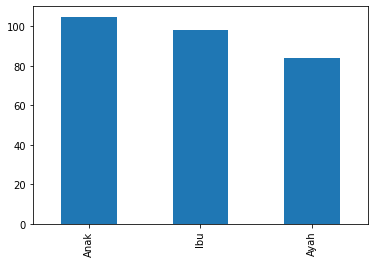

In [ ]:
cat_value = data['Peran'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

21-55    184
15-20     48
>55       29
15<       26
Name: Umur, dtype: int64


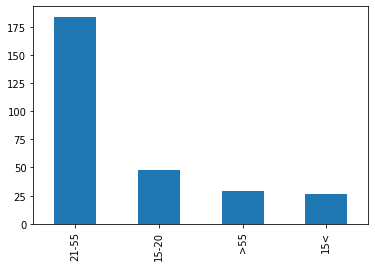

In [ ]:
cat_value = data['Umur'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Makanan      149
Olahraga      59
Alam          28
Hiburan       23
Teknologi     20
Edukasi        6
Keuangan       1
Binatang       1
Name: Minat, dtype: int64


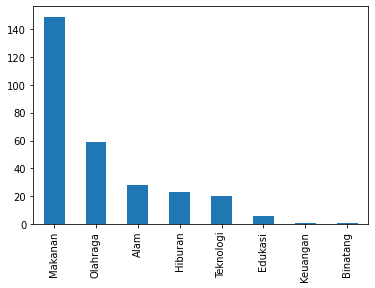

In [ ]:
cat_value = data['Minat'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Hiburan      96
Alam         41
Edukasi      40
Olahraga     36
Keuangan     29
Teknologi    29
Animasi       6
Binatang      6
Literatur     4
Name: Minat1, dtype: int64


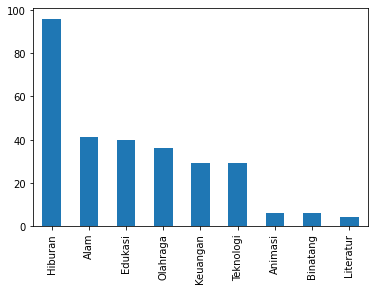

In [ ]:
cat_value = data['Minat1'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Kesehatan    85
Keuangan     55
Hiburan      43
Edukasi      27
Binatang     25
Animasi      23
Teknologi    13
Literatur    13
Alam          3
Name: Minat2, dtype: int64


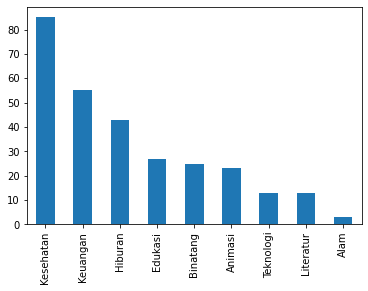

In [ ]:
cat_value = data['Minat2'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Masak           142
Sosialisasi      43
Swakarya/DIY     39
Otomotif         21
Manajemen        19
Berkebun         15
Kelistrikan       8
Name: Keahlian, dtype: int64


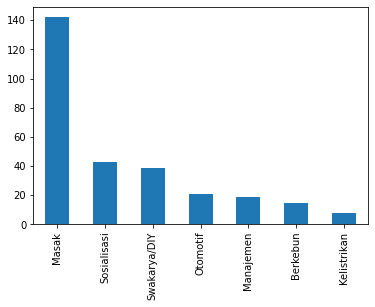

In [ ]:
cat_value = data['Keahlian'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Berkebun        124
Manajemen        52
Sosialisasi      47
Swakarya/DIY     26
Otomotif         20
Kelistrikan      18
Name: Keahlian1, dtype: int64


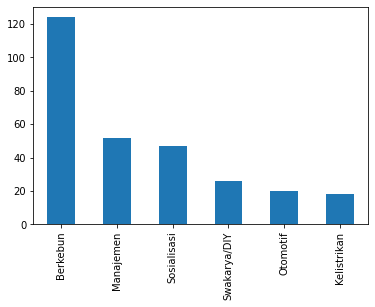

In [ ]:
cat_value = data['Keahlian1'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

In [ ]:
x = data.drop(['Aktivitas'], axis=1)
y = data['Aktivitas']

le = LabelEncoder()
x = pd.get_dummies(x)
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Create Model

In [ ]:
input = keras.Input(shape=(46,))
dense1 = keras.layers.Dense(46, activation='relu')(input)
dense2 = keras.layers.Dense(100, activation='relu')(dense1)
dense3 = keras.layers.Dense(100, activation='relu')(dense2)
dense4 = keras.layers.Dense(200, activation='relu')(dense3)
output = keras.layers.Dense(1)(dense4)

model = keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_5 (Dense)             (None, 46)                2162      
                                                                 
 dense_6 (Dense)             (None, 100)               4700      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 200)               20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 201       
                                                                 
Total params: 37,363
Trainable params: 37,363
Non-trainable

# Train Model

In [ ]:
history = model.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
9/9 [==============================] - 0s 3ms/step - loss: 11.8192
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 6.0362
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 4.4777
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 4.0337
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 3.6444
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 3.4964
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 3.2274
Epoch 8/20
9/9 [==============================] - 0s 4ms/step - loss: 3.1066
Epoch 9/20
9/9 [==============================] - 0s 3ms/step - loss: 2.9487
Epoch 10/20
9/9 [==============================] - 0s 3ms/step - loss: 2.9151
Epoch 11/20
9/9 [==============================] - 0s 3ms/step - loss: 2.6423
Epoch 12/20
9/9 [==============================] - 0s 3ms/step - loss: 2.4834
Epoch 13/20
9/9 [==============================] - 0s 3ms/step - loss: 2

# Evaluate Model

Text(0, 0.5, 'Training Error')

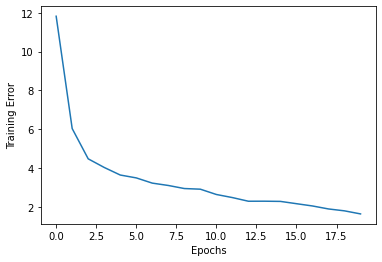

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 3.7374


3.737399101257324

# Model Save

In [ ]:
model.save('haepe.h5')

# TF Lite Convert

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_file = pathlib.Path('/content/haepe.tflite')
tflite_file.write_bytes(tflite_model)